- The terms LLM (Large Language Model) and Chat Model are related but not interchangeable — they refer to different aspects of AI models.

# 🧠 1. LLM (Large Language Model)
A general-purpose text generation model.

Trained on vast amounts of data to predict the next word in a sequence.

Can perform a wide range of tasks: summarization, classification, translation, question answering, etc.

Example APIs: text-davinci-003, gpt-4, mistral, llama, falcon.

✅ Use Cases:
Generate blog posts

Complete code

Answer factual questions

Build embeddings

# 💬 2. Chat Model
A type of LLM fine-tuned for multi-turn conversations.

Specially trained with dialogue data and designed to handle back-and-forth interaction with context retention.

Often uses system/user/assistant roles for structured input (like OpenAI's Chat API).

✅ Use Cases:
Chatbots and virtual assistants

Agents (like LangChain agents or AutoGPT)

Customer support, tutoring, role-playing apps

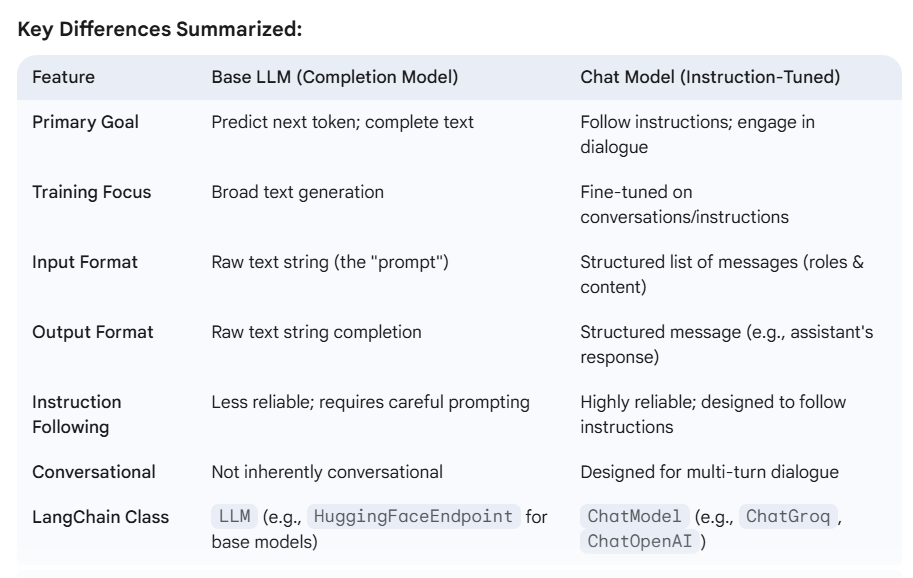

In [1]:
from PIL import Image
from IPython.display import display

# Load and display the image
img = Image.open('llm.png')
display(img)

In [32]:
from transformers import pipeline, set_seed

In [33]:
generator = pipeline('text-generation', model='gpt2')

Device set to use cpu


In [34]:
# Example 1: Simple completion
prompt1 = "The capital of France is"

# For a base LLM, we just let it continue the text
result1 = generator(prompt1, max_new_tokens=20, num_return_sequences=1, do_sample=False)

print(result1[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The capital of France is the capital of the French Republic, and the capital of the French Republic is the capital of the French


In [39]:
# Example 2: Trying to give an instruction (which it likely won't follow well)
prompt2 = "Translate 'hello' to Spanish:"
result2 = generator(prompt2, max_new_tokens=50, num_return_sequences=1, do_sample=False)
print(result2[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Translate 'hello' to Spanish:

Translation:

Hello,

I'm a Spanish speaker.

I'm a Spanish speaker.

I'm a Spanish speaker.

I'm a Spanish speaker.

I'm a Spanish speaker.




In [2]:
import os
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [3]:
if not os.environ.get("GROQ_API_KEY"):
  os.environ["GROQ_API_KEY"] = getpass.getpass("Enter API key for Groq: ")

Enter API key for Groq:  ········


In [18]:
# --- DEMONSTRATION 2: "CHAT MODEL" STYLE INTERACTION ---
# We use a ChatPromptTemplate with explicit roles (system, user),
# which is how chat models are designed to be interacted with.


chat_model_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant that answers questions directly and accurately."),
    ("user", "{question}")
])

chat_model_chain = chat_model_prompt | llm | StrOutputParser()

The capital of France is Paris.


In [36]:
question_chat = "What is the capital of France?"
response_chat = chat_model_chain.invoke({"question": question_chat})
print(response_chat)

The capital of France is Paris.


In [38]:
prompt = "Translate 'hello' to Spanish:"
response_prompt = chat_model_chain.invoke({"question": prompt})
print(response_prompt)

The translation of "hello" to Spanish is:

- **Hola** (informal)
- **Buenos días** (good morning)
- **Buenas tardes** (good afternoon)
- **Buenas noches** (good evening/night)

Choose the appropriate greeting based on the time of day.
